In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

ratings_data = pd.read_csv('tourism_rating.csv')

min_rating = min(ratings_data['Place_Ratings'])

max_rating = max(ratings_data['Place_Ratings'])

# Se divide el conjunto de datos en entrenamiento y prueba
train_data, test_data = train_test_split(ratings_data, test_size=0.2)
X_train = train_data[["User_Id", "Place_Id"]].values
y_train = train_data["Place_Ratings"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

X_test = test_data[["User_Id", "Place_Id"]].values
y_test = test_data["Place_Ratings"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Se crea un modelo KNN con los datos de entrenamiento
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

# Se hacen predicciones con el modelo
y_pred = model.predict(X_test)

# Se evalúa el modelo con las métricas de MSE y R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)


MSE: 0.15773958333333332
R^2: -0.34082701835063833


In [ ]:
y_pred_cm = np.round(y_pred *4 +1)
y_test_cm = np.round(y_test * 4 +1)

In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_cm, y_pred_cm)
print(cm)

[[ 12  80 163  88   5]
 [ 16  87 171 113  14]
 [  6  83 197 138  14]
 [  7 105 184 119  10]
 [ 10  98 163 108   9]]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = list(range(1, 11))
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Imprimir los resultados de cada iteración
print("Iter\tK value\tMSE")
for i, mse in enumerate(mse_scores):
    #print("k = {}, MSE = {}".format(k_values[i], mse))
    print(f"{i+1}\t{k_values[i]:.4f}\t{mse:.4f}")

Iter	K value	MSE
1	1.0000	0.2415
2	2.0000	0.1802
3	3.0000	0.1577
4	4.0000	0.1477
5	5.0000	0.1411
6	6.0000	0.1376
7	7.0000	0.1332
8	8.0000	0.1320
9	9.0000	0.1306
10	10.0000	0.1292


In [ ]:
user_id = 10
place_id = 344
prediction = model.predict(np.array([[user_id, place_id]]))
print(prediction[0] * (max_rating - min_rating) + min_rating)

3.0


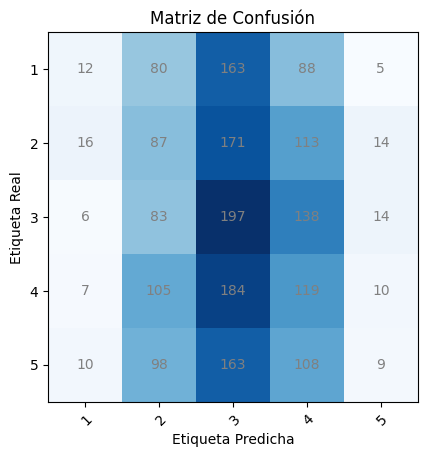

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que y_test e y_pred tienen los mismos valores que mencionaste anteriormente

# Generar la matriz de confusión
conf_matrix = cm

# Configurar el gráfico
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, cmap='Blues')

# Etiquetas de los ejes
ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(5))
ax.set_xticklabels(['1', '2', '3', '4', '5'])
ax.set_yticklabels(['1', '2', '3', '4', '5'])

# Rotar las etiquetas de los ejes
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Anotaciones en cada celda
for i in range(5):
    for j in range(5):
        text = ax.text(j, i, conf_matrix[i, j],
                       ha="center", va="center", color="gray")

# Título y etiquetas
ax.set_title("Matriz de Confusión")
ax.set_xlabel("Etiqueta Predicha")
ax.set_ylabel("Etiqueta Real")

# Mostrar el gráfico
plt.show()